# Names: Lara Mechling, Corrina Hanson, Isaac Liem
## Date: 10/15/2022
## Course: DSC 450

# Title: Predicting Patients Diabetes Status

### Isaac Liem - Data Wrangler

In [35]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

diabetes = pd.read_csv('diabetes.csv')

In [36]:
#Show sample of dataset
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [37]:
# Check data types and for non-null fields
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
# numerical features histograms

'''
Hands On Predictive Analytics with Python
Alvaro Fuentes
'''
def desc_num_feature(feature_name, bins= 30, edgecolor= 'k', **kwargs):
    fig, ax= plt.subplots(figsize= (8, 4))
    diabetes[feature_name].hist(bins= bins, edgecolor= edgecolor, ax= ax, **kwargs)
    ax.set_title(feature_name, size= 15)
    plt.figtext(1, 0.15, str(diabetes[feature_name].describe().round(2)), size= 17)

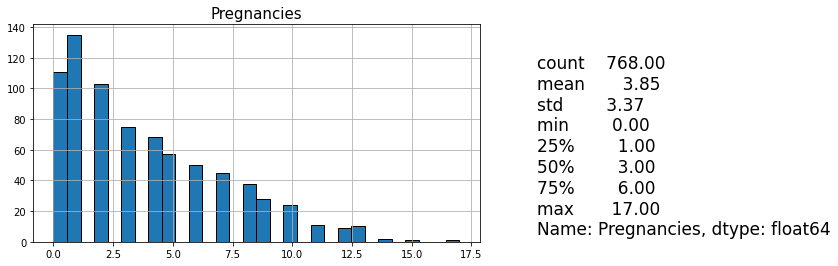

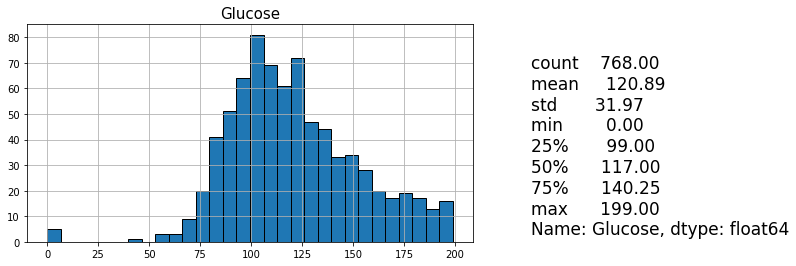

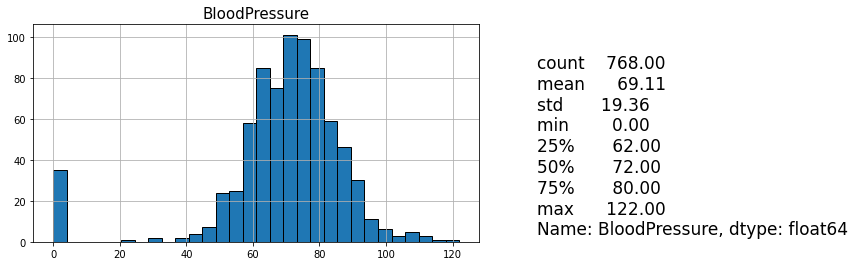

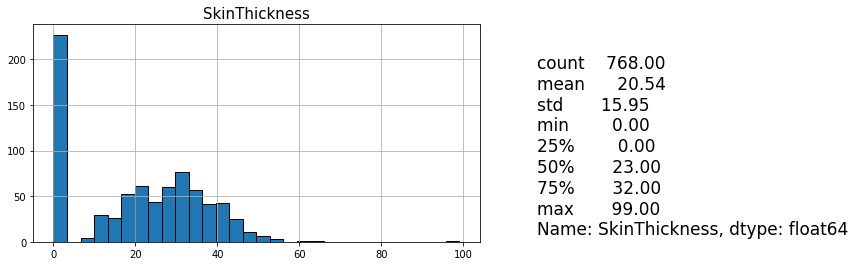

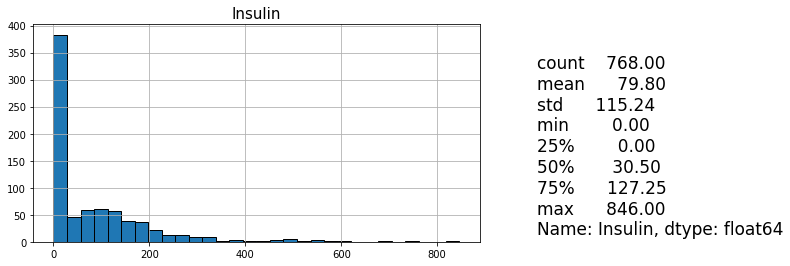

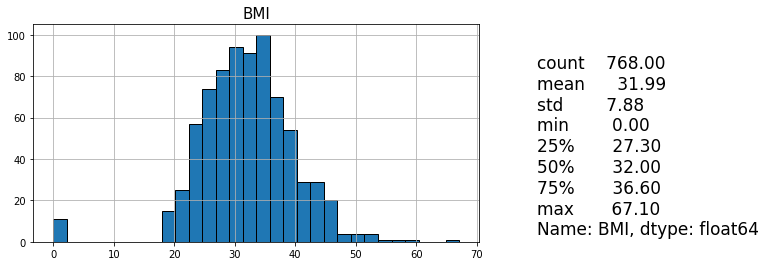

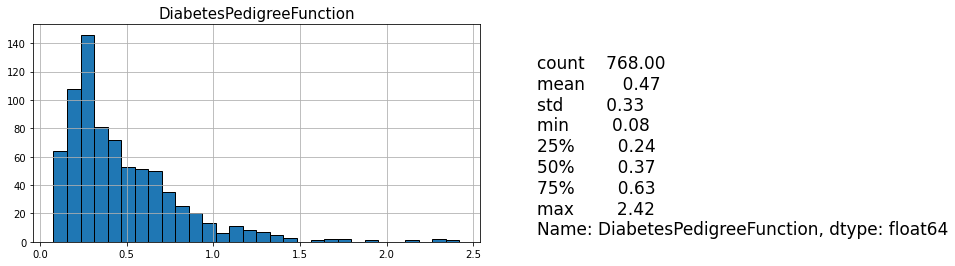

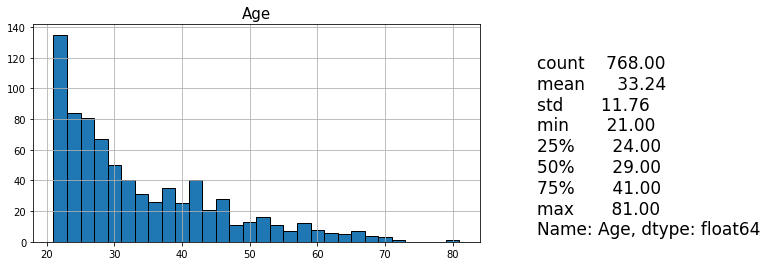

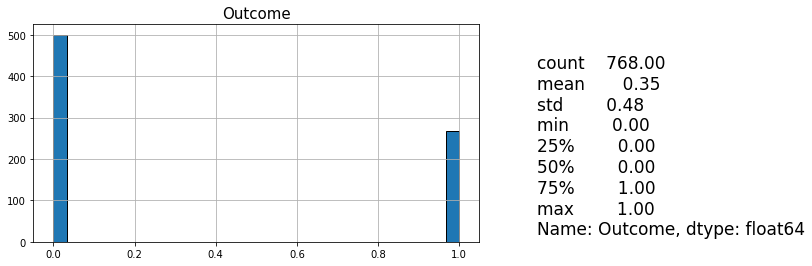

In [39]:
# view distributions of numerical features
for column in diabetes.columns:
    desc_num_feature(column)

In [40]:
# Show pandas profiling report
pandas_profiling.ProfileReport(diabetes)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


In [41]:
from sklearn.preprocessing import MinMaxScaler

# get column names of the features
diabetes_feat = diabetes.drop(['Outcome'], axis=1)
diabetes_feat = diabetes_feat.columns.tolist()

# initialize scaler and scale the feature columns
scaler = MinMaxScaler()
diabetes.loc[:, diabetes_feat] = scaler.fit_transform(diabetes[diabetes_feat])
diabetes.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1

In [42]:
# show metrics of the data after scaling
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.607510       0.566438       0.207439    0.094326   
std       0.198210    0.160666       0.158654       0.161134    0.136222   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.497487       0.508197       0.000000    0.000000   
50%       0.176471    0.587940       0.590164       0.232323    0.036052   
75%       0.352941    0.704774       0.655738       0.323232    0.150414   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.476790                  0.168179    0.204015    0.348958  
std      0.117499                  0.141473    0.196004    0.476951  
min      0.000000                  0.000000    0.000000    0.000000  
25%      0.406855                  0.070773    0.050000    0.000000  
50%      0.476900                  0.125747    0.133333    0.000000  
75%      0.545455                  0.234095    0.333333    1.000000  
max      1.000000                  1.000000    1.000000    1.000000